In [ ]:
import pandas as pd
df=pd.read_csv('/content/spotify-2023.csv')
df

UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7250-7251: invalid continuation byte

In [ ]:
!pip install chardet

In [ ]:
import chardet

In [ ]:
with open('/content/spotify-2023.csv', 'rb') as f:
    encoding = chardet.detect(f.read())['encoding']

In [ ]:
df = pd.read_csv('/content/spotify-2023.csv', encoding=encoding)

In [ ]:
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

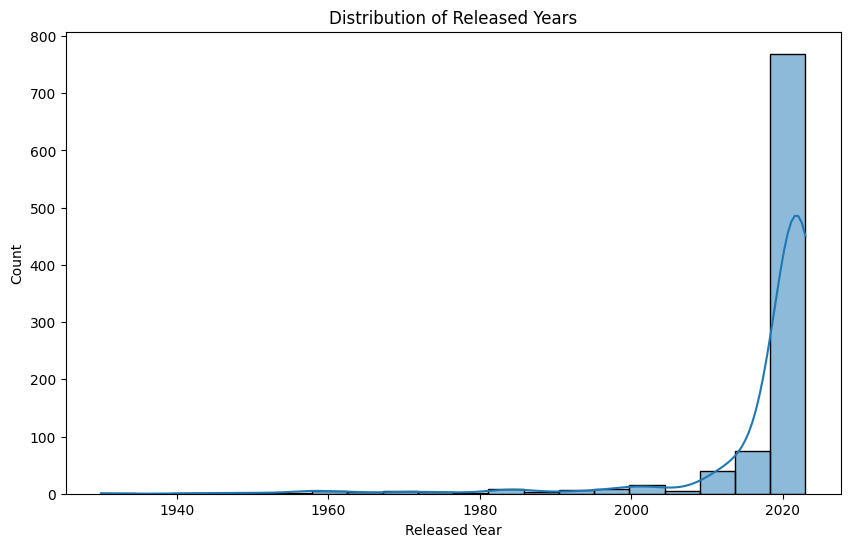

<ipython-input-9-7c4156dcf22f>:27: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


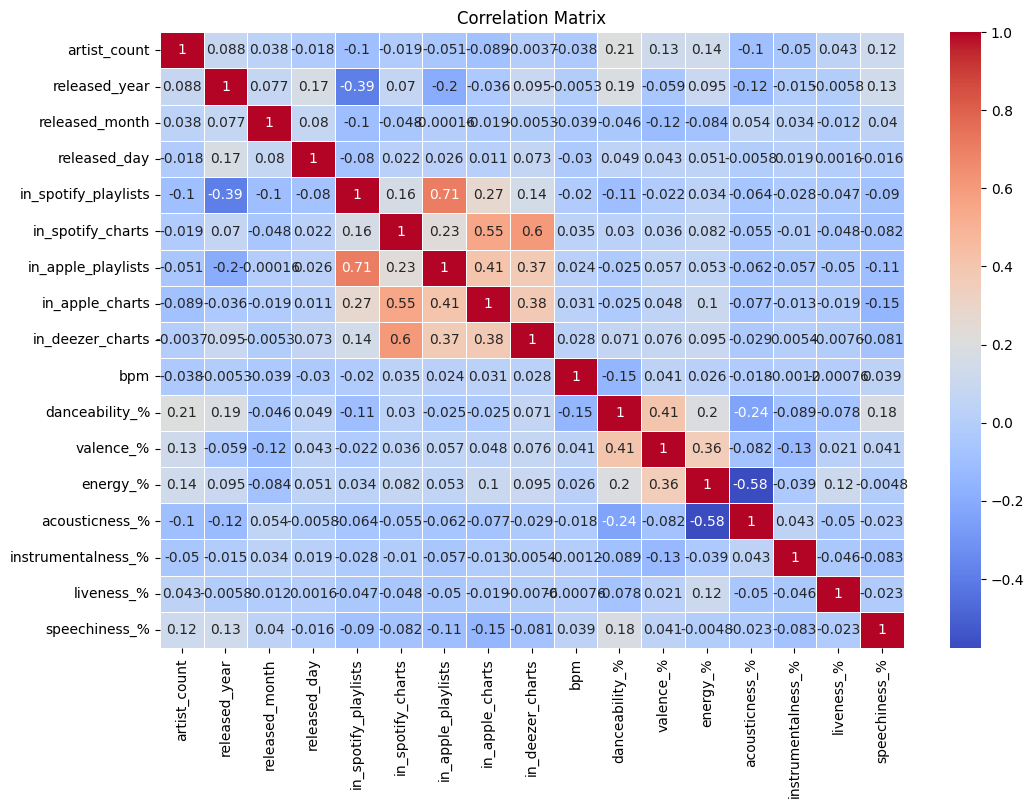

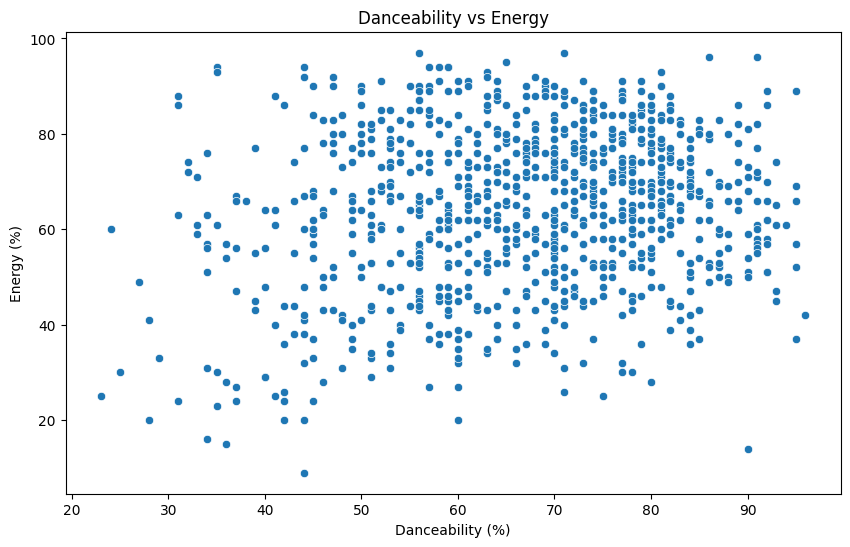

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


print(df.info())

# Display the first few rows of the dataset
print(df.head())

# Summary statistics
print(df.describe())

# Visualize the distribution of released years
plt.figure(figsize=(10, 6))
sns.histplot(df['released_year'], bins=20, kde=True)
plt.title('Distribution of Released Years')
plt.xlabel('Released Year')
plt.ylabel('Count')
plt.show()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# Visualize the relationship between danceability and energy
plt.figure(figsize=(10, 6))
sns.scatterplot(x='danceability_%', y='energy_%', data=df)
plt.title('Danceability vs Energy')
plt.xlabel('Danceability (%)')
plt.ylabel('Energy (%)')
plt.show()


<ipython-input-10-5d9a8bf87943>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yearly_song_counts.index, y=yearly_song_counts.values, palette='viridis')


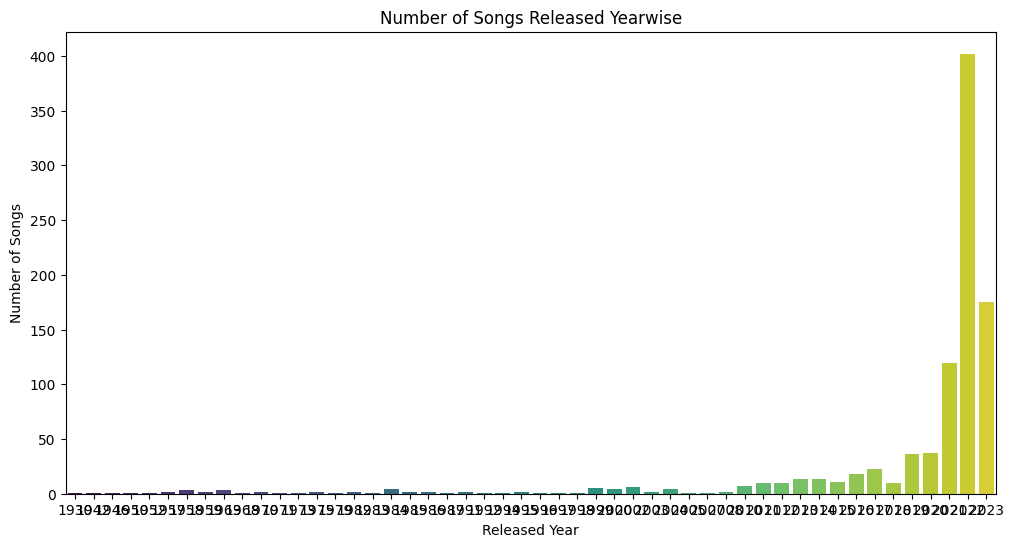

In [ ]:
yearly_song_counts = df['released_year'].value_counts().sort_index()

# Plotting the bar graph
plt.figure(figsize=(12, 6))
sns.barplot(x=yearly_song_counts.index, y=yearly_song_counts.values, palette='viridis')
plt.title('Number of Songs Released Yearwise')
plt.xlabel('Released Year')
plt.ylabel('Number of Songs')
plt.show()

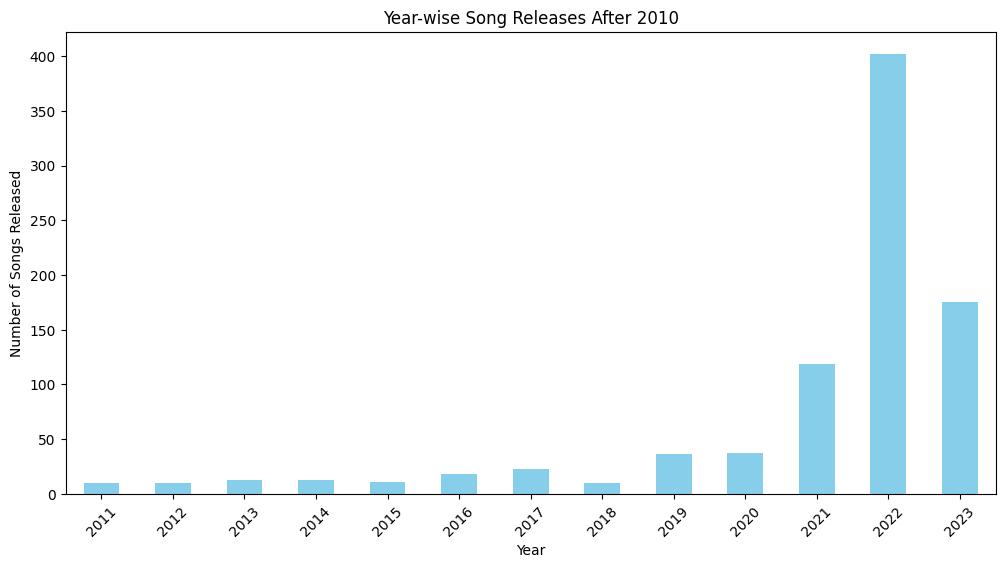

In [ ]:
df['released_year'] = pd.to_datetime(df['released_year'], format='%Y')

# Filter data for songs released after the year 2010
df_after_2010 = df[df['released_year'] >= '2011']



# Count the number of songs released each year after 2010
yearly_counts = df_after_2010['released_year'].dt.year.value_counts().sort_index()

# Plotting the bar graph
plt.figure(figsize=(12, 6))
yearly_counts.plot(kind='bar', color='skyblue')
plt.title('Year-wise Song Releases After 2010')
plt.xlabel('Year')
plt.ylabel('Number of Songs Released')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.head(2)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023-01-01,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023-01-01,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4


<ipython-input-14-b5c9131a5e3c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yearly_song_counts.index, y=yearly_song_counts.values, palette='viridis')


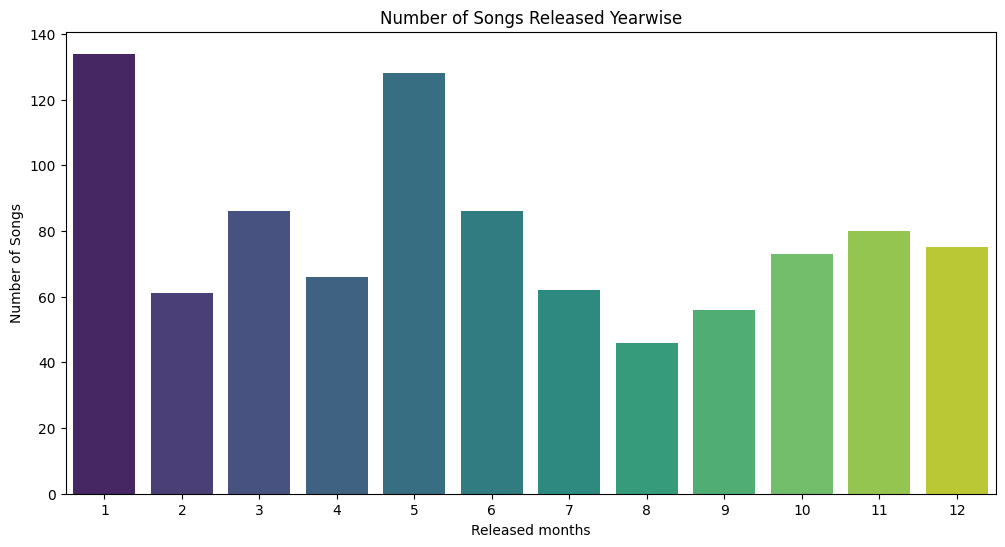

In [ ]:
yearly_song_counts = df['released_month'].value_counts().sort_index()

# Plotting the bar graph
plt.figure(figsize=(12, 6))
sns.barplot(x=yearly_song_counts.index, y=yearly_song_counts.values, palette='viridis')
plt.title('Number of Songs Released Yearwise')
plt.xlabel('Released months')
plt.ylabel('Number of Songs')
plt.show()

<ipython-input-15-32cff9baf04b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yearly_song_counts.index, y=yearly_song_counts.values, palette='viridis')


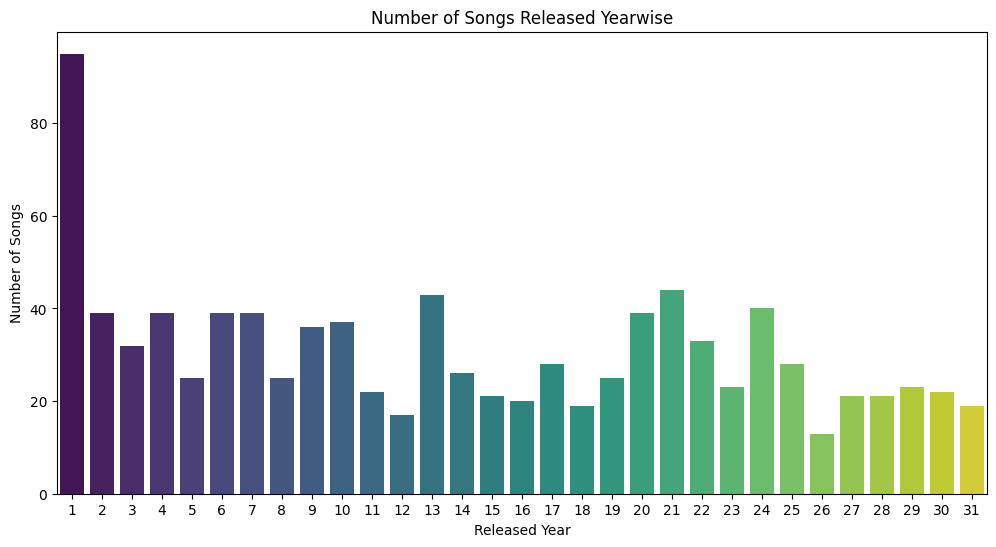

In [ ]:
yearly_song_counts = df['released_day'].value_counts().sort_index()

# Plotting the bar graph
plt.figure(figsize=(12, 6))
sns.barplot(x=yearly_song_counts.index, y=yearly_song_counts.values, palette='viridis')
plt.title('Number of Songs Released Yearwise')
plt.xlabel('Released days')
plt.ylabel('Number of Songs')
plt.show()

<ipython-input-16-81bc28ad0308>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yearly_song_counts.index, y=yearly_song_counts.values, palette='viridis')


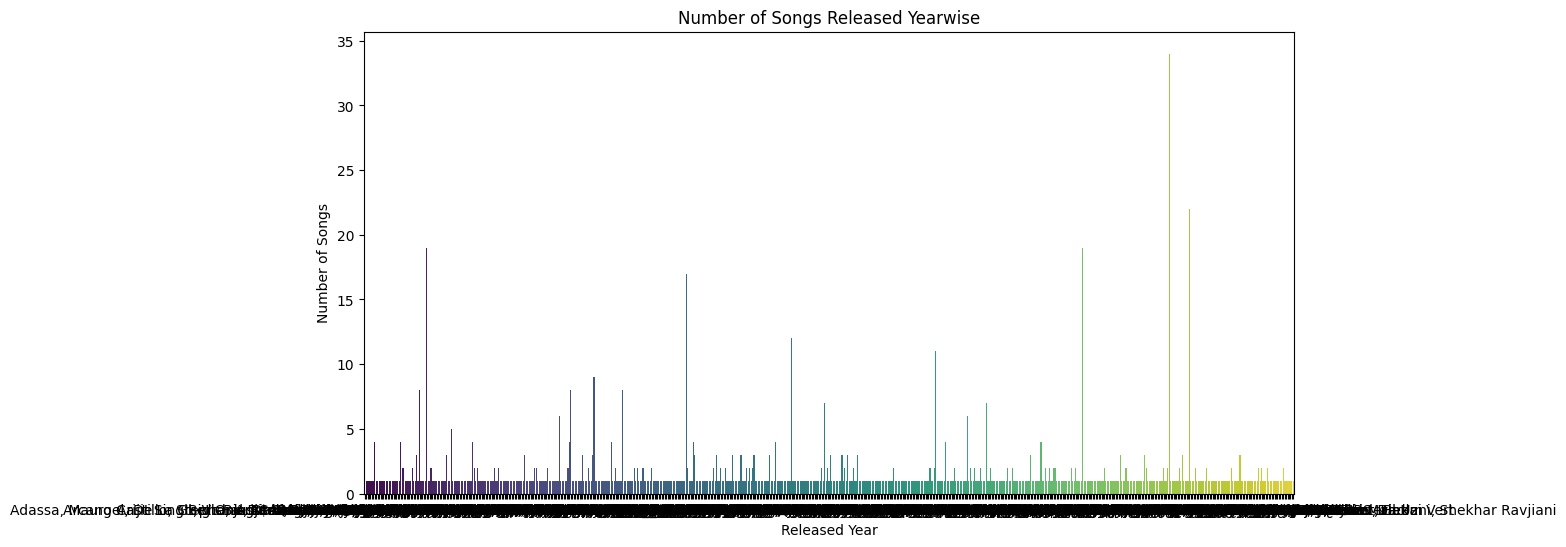

In [ ]:
yearly_song_counts = df['artist(s)_name'].value_counts().sort_index()

# Plotting the bar graph
plt.figure(figsize=(12, 6))
sns.barplot(x=yearly_song_counts.index, y=yearly_song_counts.values, palette='viridis')
plt.title('Number of Songs Released Yearwise')
plt.xlabel('Released Year')
plt.ylabel('Number of Songs')
plt.show()

Top 20 Artists:
Taylor Swift        34
The Weeknd          22
Bad Bunny           19
SZA                 19
Harry Styles        17
Kendrick Lamar      12
Morgan Wallen       11
Ed Sheeran           9
BTS                  8
Feid                 8
Drake, 21 Savage     8
Labrinth             7
Olivia Rodrigo       7
NewJeans             6
Doja Cat             6
Billie Eilish        5
Drake                4
IVE                  4
Arctic Monkeys       4
Karol G              4
Adele                4
Bruno Mars           4
Quevedo              4
Mï¿½ï¿½ne            4
Eminem               4
Name: artist(s)_name, dtype: int64


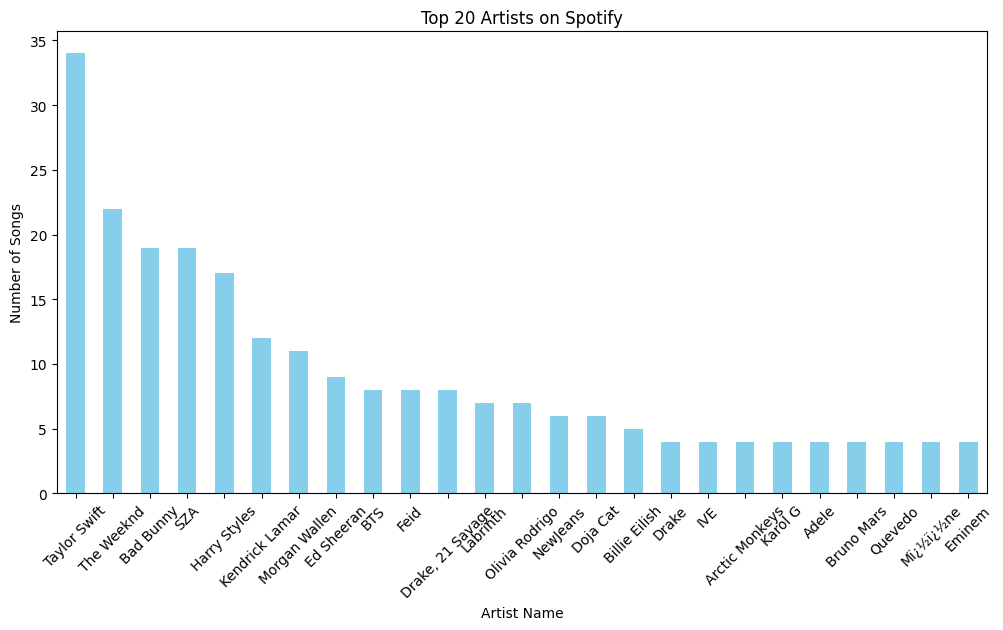

In [ ]:
top_artists = df['artist(s)_name'].value_counts().head(25)

# Display the top 20 artists and their counts
print("Top 20 Artists:")
print(top_artists)


import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
top_artists.plot(kind='bar', color='skyblue')
plt.title('Top 20 Artists on Spotify')
plt.xlabel('Artist Name')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.head(2)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023-01-01,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023-01-01,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4


In [ ]:
df['streams'].dtype

dtype('O')

In [ ]:
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

Top 20 Tracks based on Spotify Streams:
                                        track_name       streams
55                                 Blinding Lights  3.703895e+09
179                                   Shape of You  3.562544e+09
86                               Someone You Loved  2.887242e+09
620                                   Dance Monkey  2.864792e+09
41   Sunflower - Spider-Man: Into the Spider-Verse  2.808097e+09
162                                      One Dance  2.713922e+09
84                       STAY (with Justin Bieber)  2.665344e+09
140                                       Believer  2.594040e+09
725                                         Closer  2.591224e+09
48                                         Starboy  2.565530e+09
138                                        Perfect  2.559529e+09
71                                      Heat Waves  2.557976e+09
14                                       As It Was  2.513188e+09
693                                      Seï¿½ï¿½o

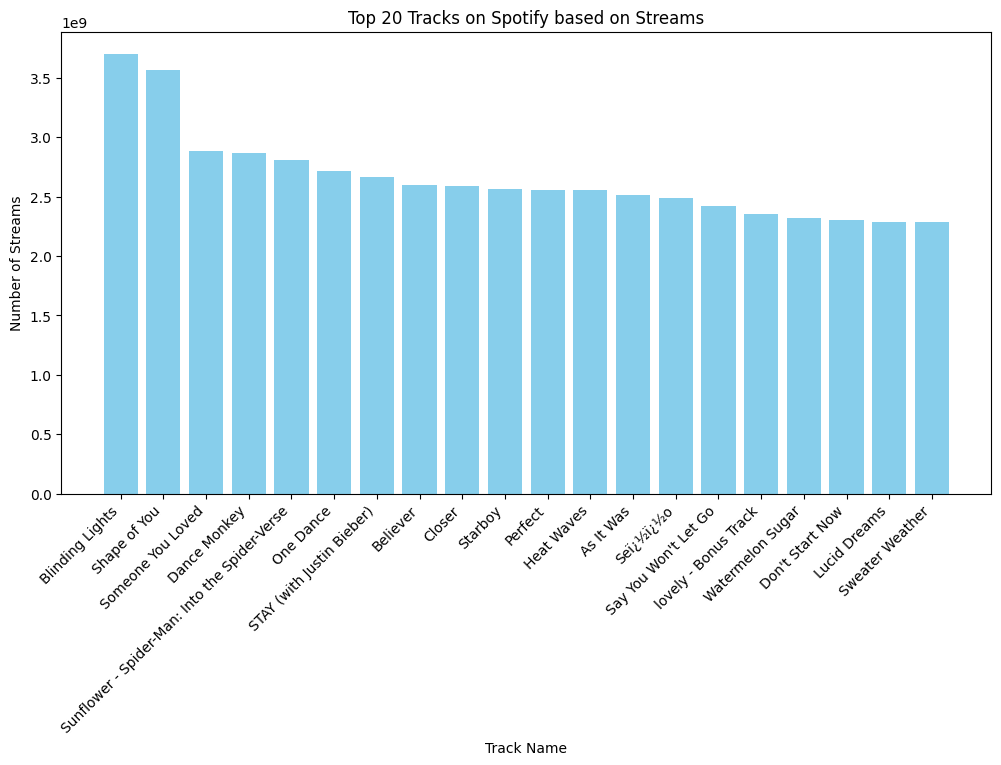

In [ ]:
top_tracks = df.nlargest(20, 'streams')[['track_name', 'streams']]

# Display the top 20 tracks and their stream counts
print("Top 20 Tracks based on Spotify Streams:")
print(top_tracks)


import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(top_tracks['track_name'], top_tracks['streams'], color='skyblue')
plt.title('Top 20 Tracks on Spotify based on Streams')
plt.xlabel('Track Name')
plt.ylabel('Number of Streams')
plt.xticks(rotation=45, ha='right')
plt.show()

Top 20 Tracks based on Danceability:
                                            track_name  danceability_%
595                                               Peru              96
224                                            Players              95
250                                The Real Slim Shady              95
321                                              CAIRO              95
423                                  Super Freaky Girl              95
702                                          Starlight              95
876                                           Ai Preto              95
268                                        Slut Me Out              94
142                        Gol Bolinha, Gol Quadrado 2              93
266                                       Shorty Party              93
669                                   Forgot About Dre              93
749                               sentaDONA (Remix) s2              93
943                                 Priv

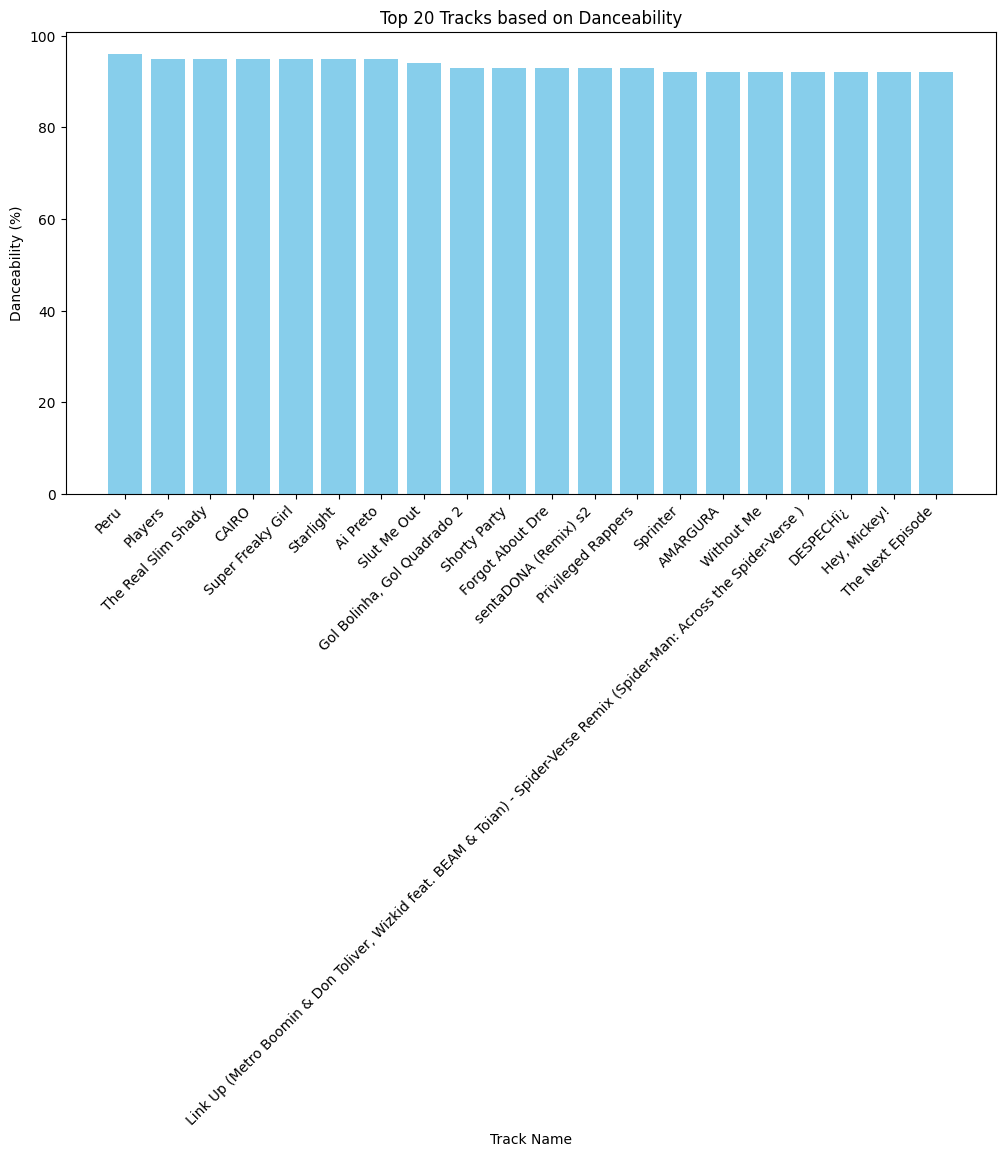

In [ ]:
top_danceability_tracks = df.nlargest(20, 'danceability_%')[['track_name', 'danceability_%']]

# Display the top 20 tracks and their danceability scores
print("Top 20 Tracks based on Danceability:")
print(top_danceability_tracks)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(top_danceability_tracks['track_name'], top_danceability_tracks['danceability_%'], color='skyblue')
plt.title('Top 20 Tracks based on Danceability')
plt.xlabel('Track Name')
plt.ylabel('Danceability (%)')
plt.xticks(rotation=45, ha='right')
plt.show()

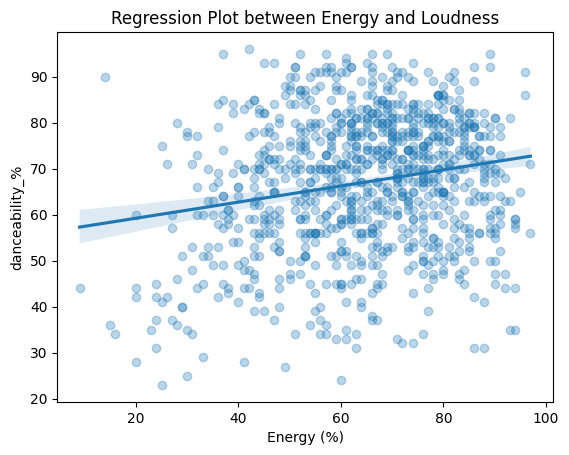

In [ ]:
import seaborn as sns
sns.regplot(x='energy_%', y='danceability_%', data=df, scatter_kws={'alpha':0.3})
plt.title('Regression Plot between Energy and Loudness')
plt.xlabel('Energy (%)')
plt.ylabel('danceability_%')
plt.show()


In [ ]:
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

<ipython-input-33-1cd658ac74c2>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


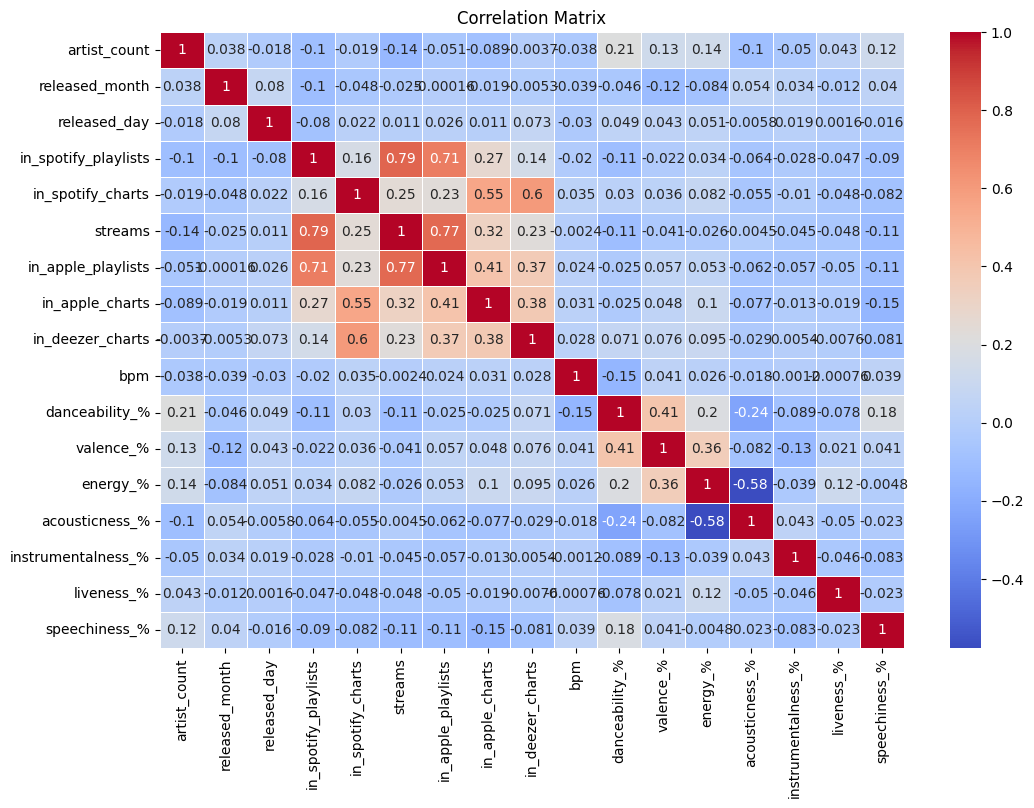

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
top_playlists = df['in_spotify_playlists'].value_counts().head(10)
print("Top Playlists:")
print(top_playlists)


Top Playlists:
1150    3
1112    3
356     3
86      3
3006    3
685     3
896     3
811     3
1473    3
892     3
Name: in_spotify_playlists, dtype: int64


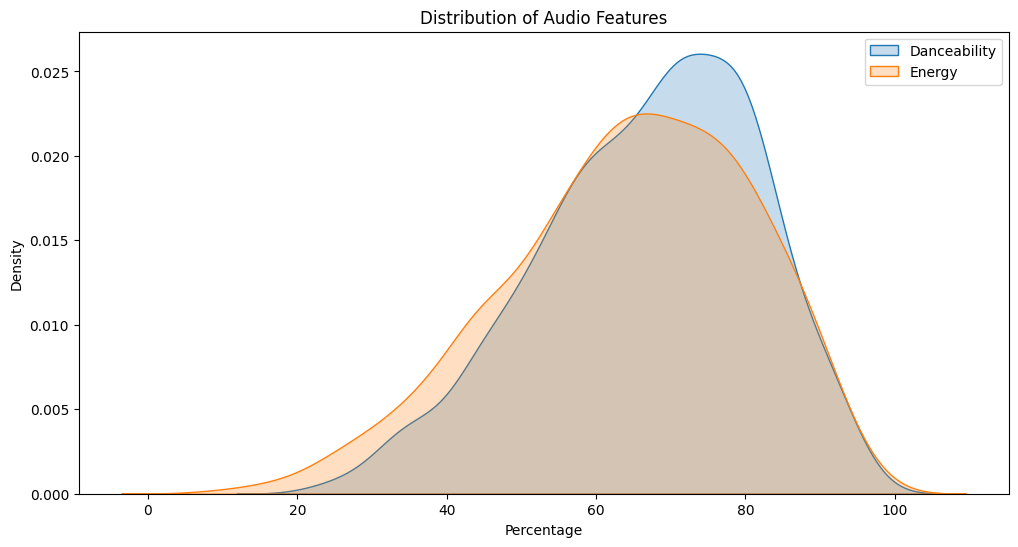

In [ ]:
plt.figure(figsize=(12, 6))
sns.kdeplot(df['danceability_%'], label='Danceability', fill=True)
sns.kdeplot(df['energy_%'], label='Energy', fill=True)
plt.title('Distribution of Audio Features')
plt.xlabel('Percentage')
plt.ylabel('Density')
plt.legend()
plt.show()


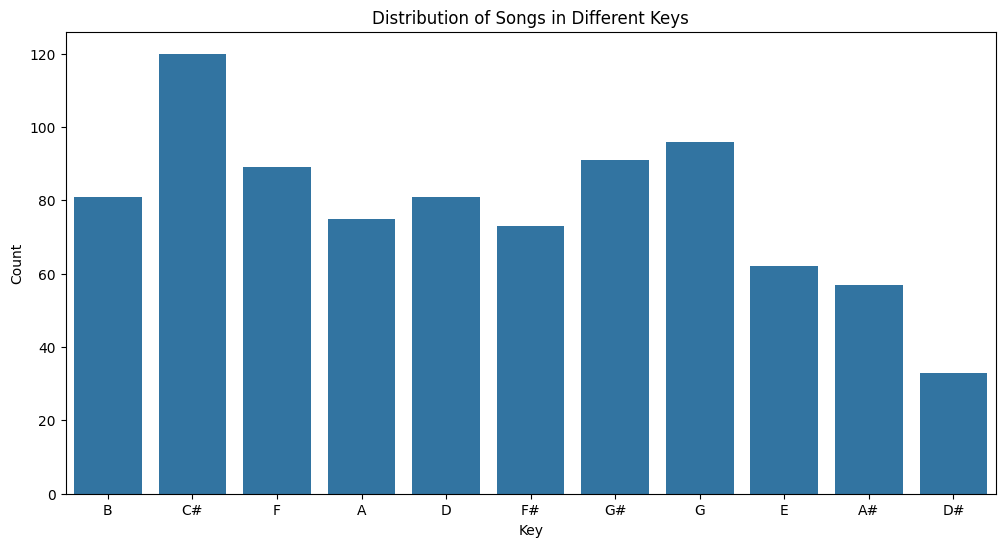

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='key', data=df)
plt.title('Distribution of Songs in Different Keys')
plt.xlabel('Key')
plt.ylabel('Count')
plt.show()


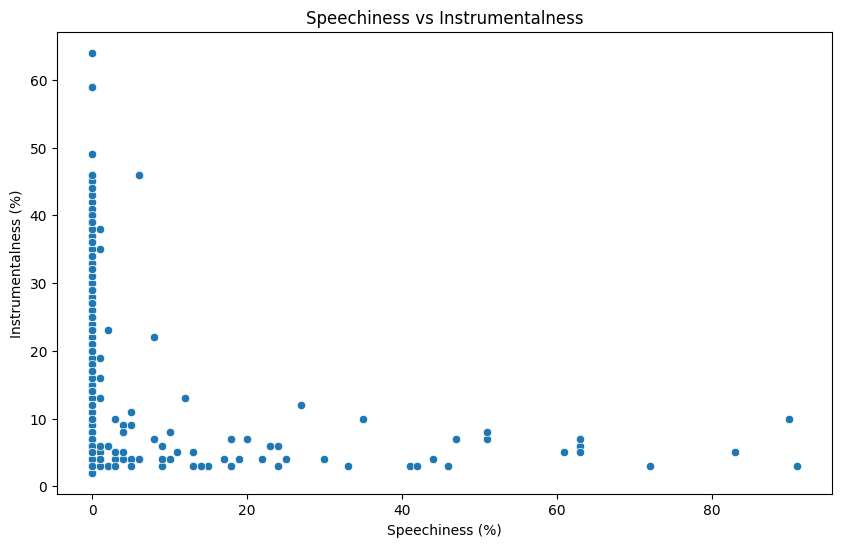

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='instrumentalness_%', y='speechiness_%', data=df)
plt.title('Speechiness vs Instrumentalness')
plt.xlabel('Speechiness (%)')
plt.ylabel('Instrumentalness (%)')
plt.show()


ValueError: Input y contains NaN.

In [ ]:
print(y_train.isna().sum())

1


In [ ]:
print(y_test.isna().sum())

0


In [ ]:
df = df.dropna(subset=['streams'])

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
y_train = imputer.fit_transform(y_train.values.reshape(-1, 1))
y_test = imputer.transform(y_test.values.reshape(-1, 1))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 952 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   track_name            952 non-null    object        
 1   artist(s)_name        952 non-null    object        
 2   artist_count          952 non-null    int64         
 3   released_year         952 non-null    datetime64[ns]
 4   released_month        952 non-null    int64         
 5   released_day          952 non-null    int64         
 6   in_spotify_playlists  952 non-null    int64         
 7   in_spotify_charts     952 non-null    int64         
 8   streams               952 non-null    float64       
 9   in_apple_playlists    952 non-null    int64         
 10  in_apple_charts       952 non-null    int64         
 11  in_deezer_playlists   952 non-null    object        
 12  in_deezer_charts      952 non-null    int64         
 13  in_shazam_charts    

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


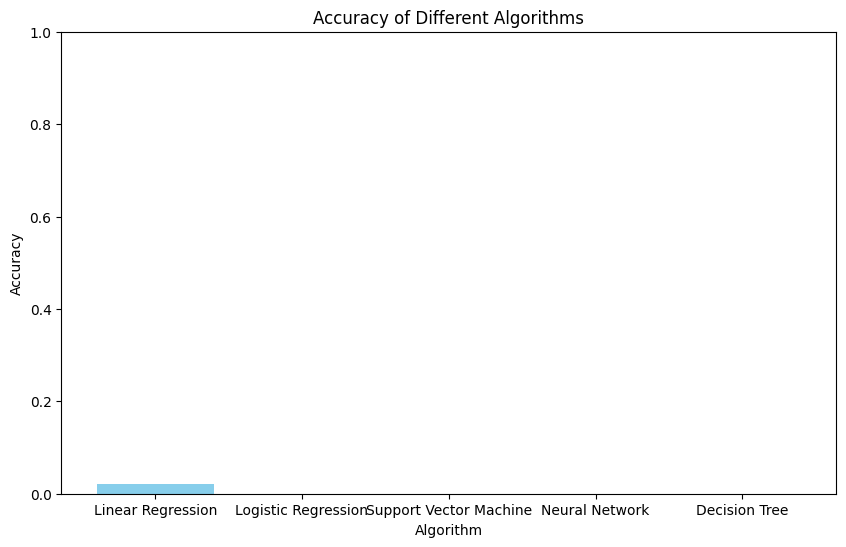

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt



# Extract features and target
X = df[['danceability_%']]
y = df['streams']  # You can replace 'streams' with another relevant target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for SVM and neural network
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVR(),
    'Neural Network': MLPRegressor(hidden_layer_sizes=(100,), max_iter=500),
    'Decision Tree': DecisionTreeRegressor()
}

# Train and evaluate models
accuracy_results = {}
for model_name, model in models.items():
    if 'Regression' in model_name:
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
    else:
        model.fit(X_train_scaled, y_train)
        predictions = model.predict(X_test_scaled)

    if 'Regression' in model_name:
        mse = mean_squared_error(y_test, predictions)
        accuracy_results[model_name] = 1 - mse / y_test.var()
    else:
        mse = mean_squared_error(y_test, predictions)
        accuracy_results[model_name] = 1 - mse / y_test.var()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(accuracy_results.keys(), accuracy_results.values(), color='skyblue')
plt.title('Accuracy of Different Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Ensure the y-axis range is between 0 and 1 for accuracy percentage
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
 # Replace 'your_dataset.csv' with your actual dataset file

# Extract features and target
X = df[['danceability_%']]
y = df['streams']  # You can replace 'streams' with another relevant target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for SVM and neural network
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)
linear_reg_predictions = linear_reg_model.predict(X_test)
linear_reg_mse = mean_squared_error(y_test, linear_reg_predictions)
print(f'Linear Regression Mean Squared Error: {linear_reg_mse}')

# Logistic Regression (Note: This is for demonstration; danceability_% is a continuous variable, not suitable for logistic regression)
logistic_reg_model = LogisticRegression()
logistic_reg_model.fit(X_train, y_train)
logistic_reg_predictions = logistic_reg_model.predict(X_test)
logistic_reg_accuracy = accuracy_score(y_test, logistic_reg_predictions)
print(f'Logistic Regression Accuracy: {logistic_reg_accuracy}')

# Support Vector Machine
svm_model = SVR()
svm_model.fit(X_train_scaled, y_train)
svm_predictions = svm_model.predict(X_test_scaled)
svm_mse = mean_squared_error(y_test, svm_predictions)
print(f'SVM Mean Squared Error: {svm_mse}')

# Neural Network
nn_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500)
nn_model.fit(X_train_scaled, y_train)
nn_predictions = nn_model.predict(X_test_scaled)
nn_mse = mean_squared_error(y_test, nn_predictions)
print(f'Neural Network Mean Squared Error: {nn_mse}')

# Decision Tree
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_predictions)
print(f'Decision Tree Mean Squared Error: {dt_mse}')


NameError: name 'df' is not defined

UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7250-7251: invalid continuation byte

In [ ]:
import traceback

In [ ]:
print(traceback.format_exc())

NoneType: None



In [ ]:
import chardet

with open('/content/spotify-2023.csv', 'rb') as f:
    encoding = chardet.detect(f.read())['encoding']

print(f"Encoding of the dataset: {encoding}")

Encoding of the dataset: ISO-8859-1


In [ ]:
df = pd.read_csv('/content/spotify-2023.csv', encoding=encoding)

In [ ]:
!head -n 10 /content/spotify-2023.csv

track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6
Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,213,88,17,946,141,C#,Major,92,66,58,19,0,8,24
Ella Baila Sola,"Eslabon Armad

In [ ]:
with open('/content/spotify-2023.csv', 'r', encoding='utf-8') as f:
    try:
        f.read()
    except UnicodeDecodeError:
        print("The file is not encoded in UTF-8.")

The file is not encoded in UTF-8.


In [ ]:
df = pd.read_csv('/content/spotify-2023.csv', encoding='latin-1')

In [ ]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load your dataset
# Replace 'your_dataset.csv' with your actual dataset file
df = pd.read_csv('/content/spotify-2023.csv')

# Assuming 'danceability_%' as the feature and 'streams' as the target variable
X = df[['danceability_%']]
y = df['streams']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for SVM and neural network
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVR(),
    'Neural Network': MLPRegressor(hidden_layer_sizes=(100,), max_iter=500),
    'Decision Tree': DecisionTreeRegressor()
}

# Train and evaluate models
accuracy_results = {}
for model_name, model in models.items():
    if 'Regression' in model_name:
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
    else:
        model.fit(X_train_scaled, y_train)
        predictions = model.predict(X_test_scaled)

    mse = mean_squared_error(y_test, predictions)
    accuracy = 1 - mse / y_test.var()
    accuracy_results[model_name] = accuracy

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(accuracy_results.keys(), accuracy_results.values(), color='skyblue')
plt.title('Accuracy of Different Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Ensure the y-axis range is between 0 and 1 for accuracy percentage
plt.show()


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7250-7251: invalid continuation byte